#<군산 외부방문자수 분석>
한국관광데이터랩의 외부 방문자수 데이터를 이용해서 군산, 목포, 통영 세곳의 방문자 수를 비교하는 EDA를 진행하였습니다.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

#년도별 군산 외부 방문자(외지인+외국인) 수 추이

In [7]:
train = pd.read_csv('../data/군산 방문객.csv', encoding = 'cp949')
train.head()

,Unnamed: 0,Unnamed: 1,2018,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,2021,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,지역,구분,1,2,3,4,5,6,7,8,...,9,10,11,12,1,2,3,4,5,6
1,군산시,외지인(b),"1,551,704","1,692,131","1,980,181","1,863,480","2,084,383","1,770,142","1,860,586","2,006,011",...,"1,889,055","2,301,326","1,758,600","1,502,218","1,430,877","1,678,344","1,919,001","1,694,074","1,988,878","1,771,766"
2,군산시,외국인(c),"10,781","11,368","12,386","12,869","14,285","11,643","17,249","18,442",...,"8,337","8,415","8,719","9,148","6,628","6,550","7,397","5,985","6,219","6,953"
3,군산시,외부방문자(b+c),"1,562,485","1,703,499","1,992,567","1,876,349","2,098,668","1,781,785","1,877,835","2,024,453",...,"1,897,392","2,309,741","1,767,319","1,511,366","1,437,505","1,684,895","1,926,398","1,700,059","1,995,098","1,778,720"
4,군산시,전년외부방문자(b'+c'),0,0,0,0,0,0,0,0,...,"2,344,183","2,241,605","2,043,981","1,897,218","1,941,184","1,262,049","1,513,627","1,593,953","2,030,314","1,772,944"


외부 방문자(외지인 + 외국인) 데이터 행만 불러오기

In [8]:
new = train.loc[[3],]
x = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월','1월','2월','3월','4월','5월','6월']
y = new.iloc[:,2:]
y = y.iloc[0,:].values

In [9]:
data = ['2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2018','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2019','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2021','2021','2021','2021','2021','2021']
final = pd.DataFrame({'년도' : data, '월별' : x,'방문객수' :y})

방문객 수 데이터에서 , 제거하고 데이터형 변환해주기

In [10]:
import re
final['방문객수'] = final['방문객수'].map(lambda x: re.sub(r',', '', x))
final['방문객수'] = final['방문객수'].apply(pd.to_numeric)

- 년도별, 월별 군산의 외부 방문자수(외지인+외국인) 추이

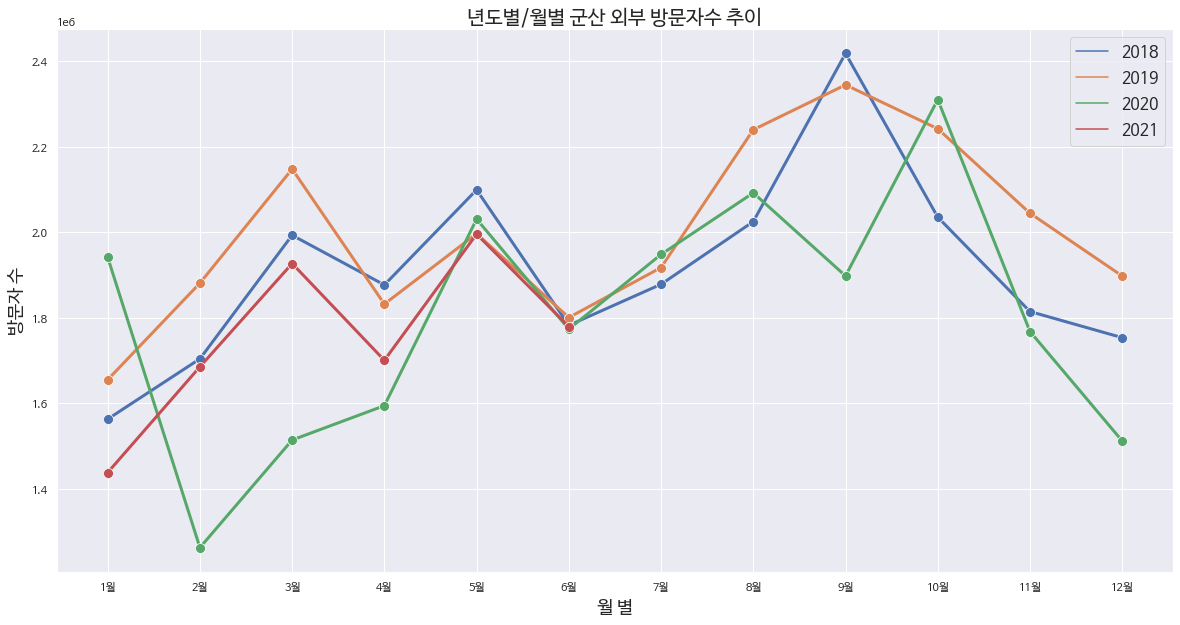

In [11]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.rc('font', family='NanumBarunGothic') 

sns.lineplot(x=final['월별'], y =final['방문객수'], hue=final['년도'], linestyle='-',marker='o',linewidth = 3,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('년도별/월별 군산 외부 방문자수 추이', fontsize=20)
plt.legend(fontsize=16)
plt.show()

- 2020년 2월 코로나의 심각성으로 인해 급격히 방문자수가 떨어진 것을 확인할 수 있음
- 대체로 12월,1월에 방문객에 줄어들고 9월이나 10월에 가장 방문객이 많은 것을 확인할 수 있음

# 년도별 외지인 vs 외국인 방문객 수 추이 비교

2018년 외지인 VS 외국인 방문객 추이

In [12]:
# 외국인 vs 외지인
# 외국인 방문객 2018
new_foreign = train.iloc[[2],2:14]

# 외지인 방문객 2018
new_korean = train.iloc[[1],2:14]

In [13]:
x2 = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
y_foreign = new_foreign.iloc[0,:].values
y_korean = new_korean.iloc[0,:].values

final2 = pd.DataFrame({'외지인 수' : y_korean,'외국인 수' :y_foreign, '월별':x2})

In [14]:
final2['외지인 수'] = final2['외지인 수'].map(lambda x: re.sub(r',', '', x))
final2['외국인 수'] = final2['외국인 수'].map(lambda x: re.sub(r',', '', x))

final2['외지인 수'] = final2['외지인 수'].apply(pd.to_numeric)
final2['외국인 수'] = final2['외국인 수'].apply(pd.to_numeric)

- 2018년 외지인 외국인 방문객수 비교

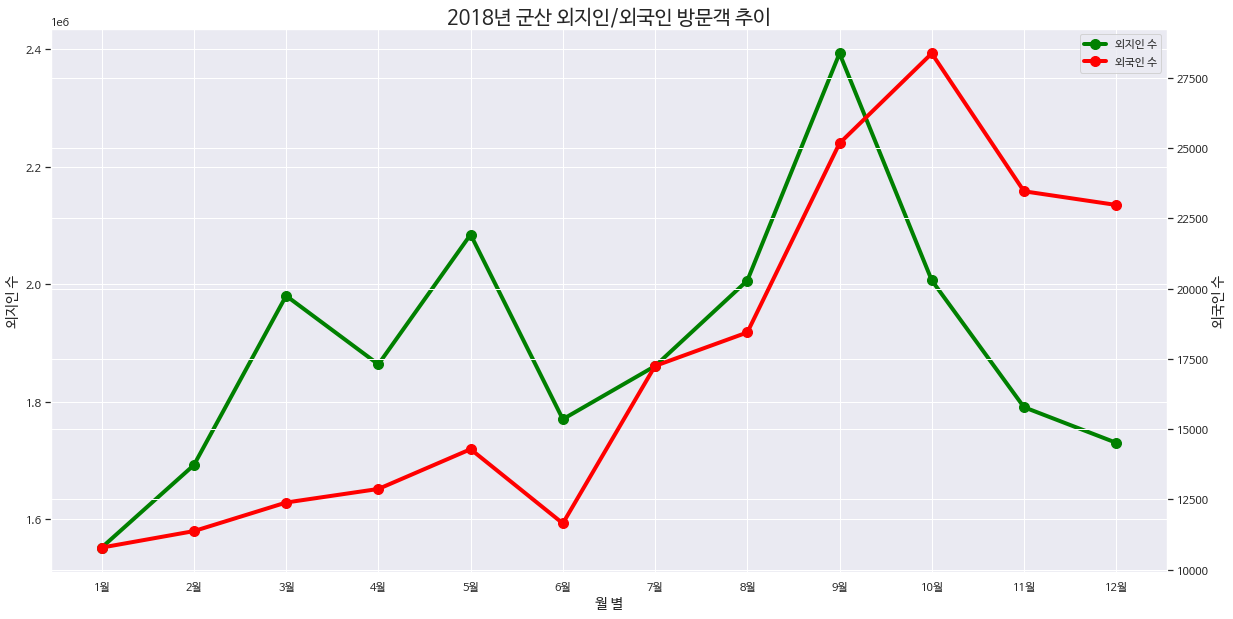

In [15]:
sns.set(rc = {'figure.figsize':(20,10)})
plt.rc('font', family='NanumBarunGothic') 

fig, ax1 = plt.subplots()
line1 = ax1.plot(x2, final2['외지인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='green', label='외지인 수')
ax2 = ax1.twinx()
line2 = ax2.plot(x2, final2['외국인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='red', label ='외국인 수')
ax1.set_xlabel('월 별',fontsize=14)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax1.legend(lines,labels, loc='upper right')

ax1.set_ylabel('외지인 수',fontsize=14)
ax2.set_ylabel('외국인 수',fontsize=14)
plt.title('2018년 군산 외지인/외국인 방문객 추이', fontsize=20)

plt.show()

2019년 외지인 VS 외국인 방문객 추이

In [16]:
# 외국인 vs 외지인
# 외국인 방문객 2019
new_foreign2 = train.iloc[[2],14:26]

# 외지인 방문객 2018
new_korean2 = train.iloc[[1],14:26]

In [17]:
y_foreign2 = new_foreign2.iloc[0,:].values
y_korean2 = new_korean2.iloc[0,:].values

final3 = pd.DataFrame({'외지인 수' : y_korean2,'외국인 수' :y_foreign2, '월별':x2})

In [18]:
final3['외지인 수'] = final3['외지인 수'].map(lambda x: re.sub(r',', '', x))
final3['외국인 수'] = final3['외국인 수'].map(lambda x: re.sub(r',', '', x))

final3['외지인 수'] = final3['외지인 수'].apply(pd.to_numeric)
final3['외국인 수'] = final3['외국인 수'].apply(pd.to_numeric)

- 2019년 군산 외지인 외국인 방문객 비교

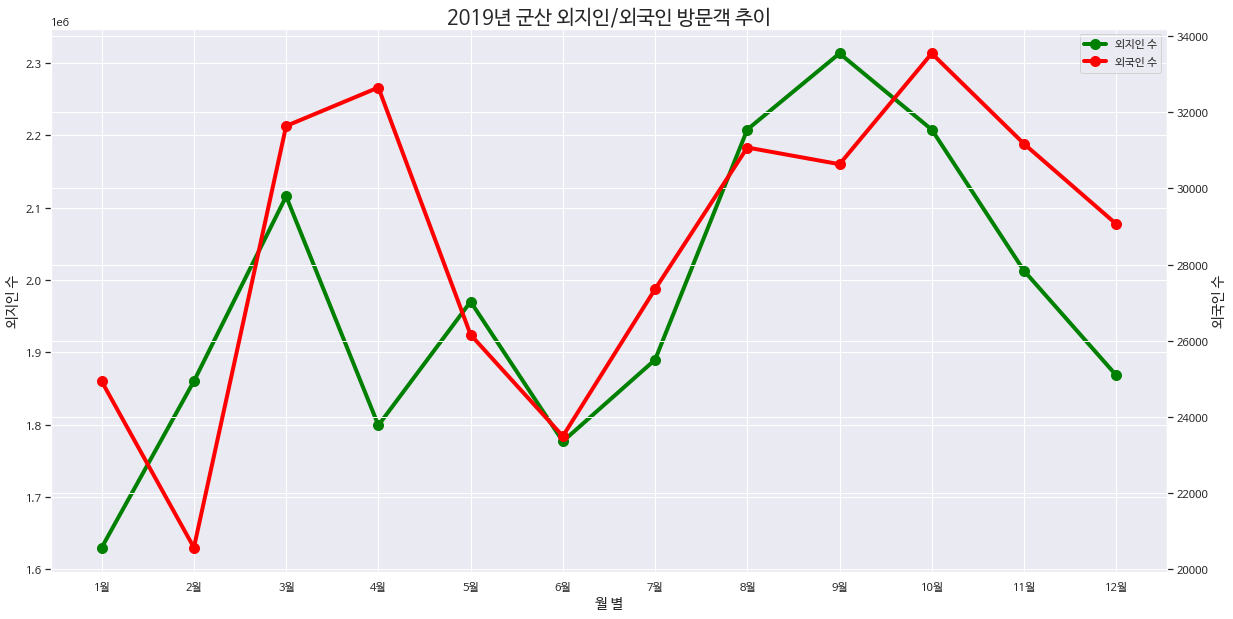

In [19]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(x2, final3['외지인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='green', label='외지인 수')
ax2 = ax1.twinx()
line2 = ax2.plot(x2, final3['외국인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='red', label ='외국인 수')
ax1.set_xlabel('월 별',fontsize=14)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax1.legend(lines,labels, loc='upper right')

ax1.set_ylabel('외지인 수',fontsize=14)
ax2.set_ylabel('외국인 수',fontsize=14)
plt.title('2019년 군산 외지인/외국인 방문객 추이', fontsize=20)

plt.show()

2020년 외지인 VS 외국인 방문객 추이

In [20]:
# 외국인 vs 외지인
# 외국인 방문객 2020
new_foreign3 = train.iloc[[2],26:38]

# 외지인 방문객 2020
new_korean3 = train.iloc[[1],26:38]

In [21]:
y_foreign3 = new_foreign3.iloc[0,:].values
y_korean3 = new_korean3.iloc[0,:].values

final4 = pd.DataFrame({'외지인 수' : y_korean3,'외국인 수' :y_foreign3, '월별':x2})

In [22]:
final4['외지인 수'] = final4['외지인 수'].map(lambda x: re.sub(r',', '', x))
final4['외국인 수'] = final4['외국인 수'].map(lambda x: re.sub(r',', '', x))

final4['외지인 수'] = final4['외지인 수'].apply(pd.to_numeric)
final4['외국인 수'] = final4['외국인 수'].apply(pd.to_numeric)

- 2020년 외지인 외국인 방문객 수 비교

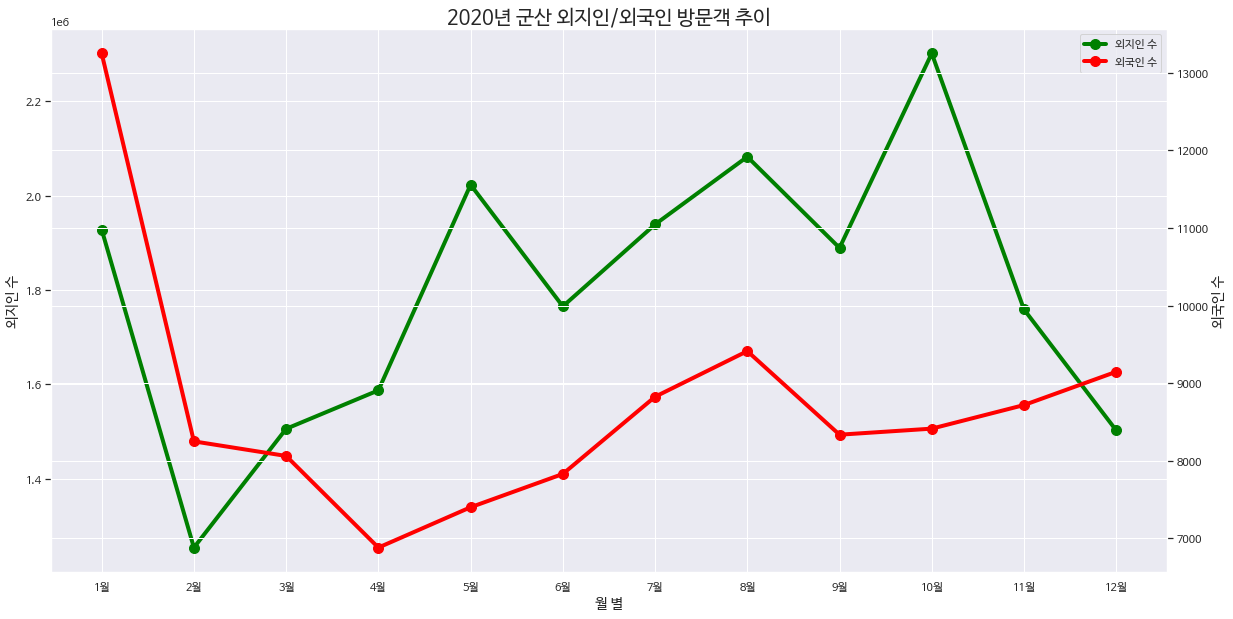

In [23]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(x2, final4['외지인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='green', label='외지인 수')
ax2 = ax1.twinx()
line2 = ax2.plot(x2, final4['외국인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='red', label ='외국인 수')
ax1.set_xlabel('월 별',fontsize=14)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax1.legend(lines,labels, loc='upper right')

ax1.set_ylabel('외지인 수',fontsize=14)
ax2.set_ylabel('외국인 수',fontsize=14)
plt.title('2020년 군산 외지인/외국인 방문객 추이', fontsize=20)

plt.show()

- 코로나 사태가 발생한 1-2월부터 급격하게 외국인 방문자수 감소


2021년 외지인 VS 외국인 방문객 추이

In [24]:
# 외국인 vs 외지인
# 외국인 방문객 2021
new_foreign4 = train.iloc[[2],38:44]

# 외지인 방문객 2021
new_korean4 = train.iloc[[1],38:44]

In [25]:
x3 = ['1월','2월','3월','4월','5월','6월']

y_foreign4 = new_foreign4.iloc[0,:].values
y_korean4 = new_korean4.iloc[0,:].values

final5 = pd.DataFrame({'외지인 수' : y_korean4,'외국인 수' :y_foreign4, '월별':x3})

In [26]:
final5['외지인 수'] = final5['외지인 수'].map(lambda x: re.sub(r',', '', x))
final5['외국인 수'] = final5['외국인 수'].map(lambda x: re.sub(r',', '', x))

final5['외지인 수'] = final5['외지인 수'].apply(pd.to_numeric)
final5['외국인 수'] = final5['외국인 수'].apply(pd.to_numeric)

- 2021년 군산 외지인 외국인 방문객 수 비교

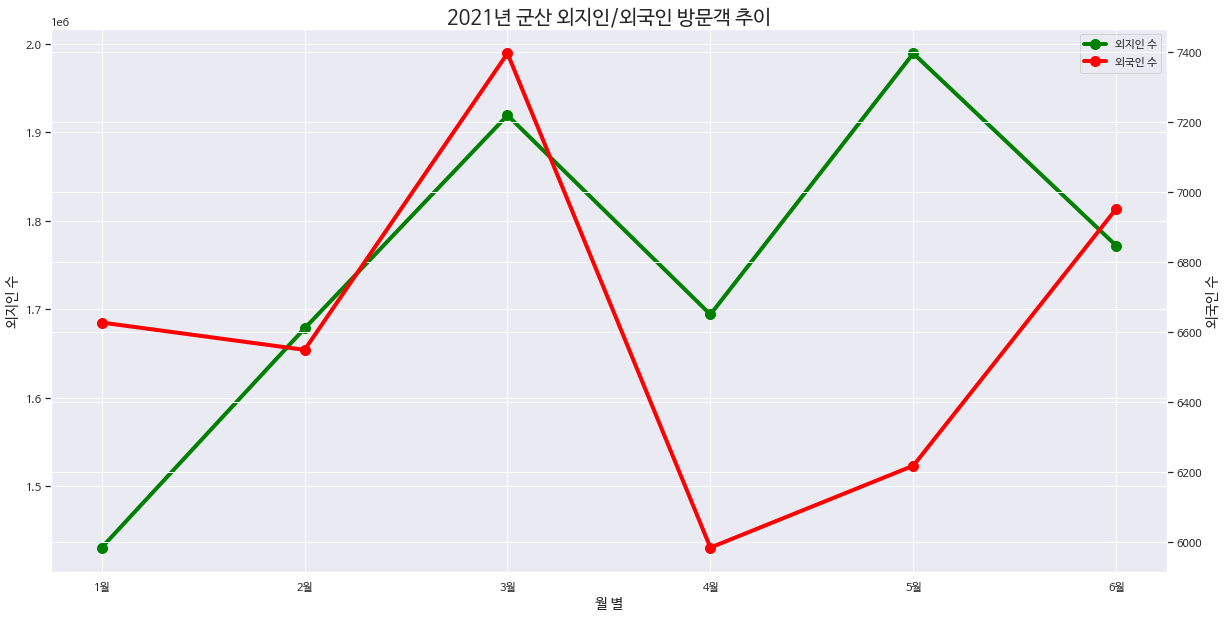

In [27]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(x3, final5['외지인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='green', label='외지인 수')
ax2 = ax1.twinx()
line2 = ax2.plot(x3, final5['외국인 수'], linestyle='-',marker='o',linewidth = 4,markersize=10, color ='red', label ='외국인 수')
ax1.set_xlabel('월 별',fontsize=14)

lines = line1+line2
labels = [l.get_label() for l in lines]
ax1.legend(lines,labels, loc='upper right')

ax1.set_ylabel('외지인 수',fontsize=14)
ax2.set_ylabel('외국인 수',fontsize=14)
plt.title('2021년 군산 외지인/외국인 방문객 추이', fontsize=20)

plt.show()

#년도별/월별 외국인 방문자 수 추이 

In [28]:
#외국인 방문객
foreign = train.loc[[2],]

y_fore= foreign.iloc[:,2:]
y_fore = y_fore.iloc[0,:].values

final_fore = pd.DataFrame({'년도' : data, '월별' : x,'외국인 관광객수' :y_fore})

In [29]:
final_fore['외국인 관광객수'] = final_fore['외국인 관광객수'].map(lambda x: re.sub(r',', '', x))
final_fore['외국인 관광객수'] = final_fore['외국인 관광객수'].apply(pd.to_numeric)

- 군산의 외국인 방문자 수 추이 lineplot

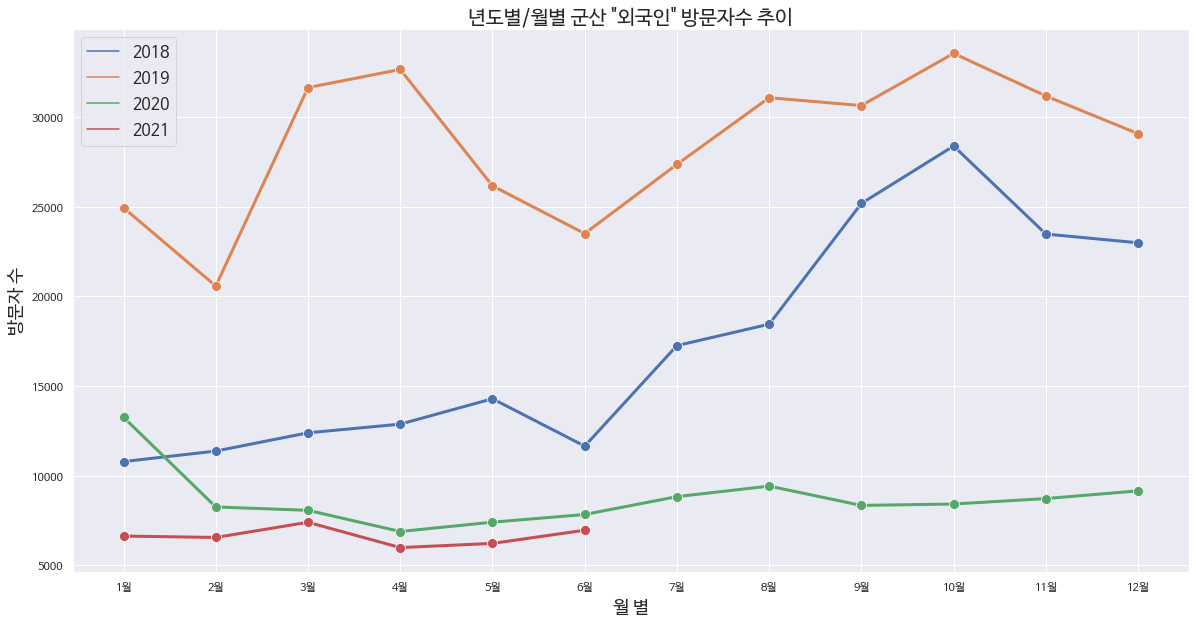

In [30]:
sns.lineplot(x=final_fore['월별'], y =final_fore['외국인 관광객수'], hue=final_fore['년도'], linestyle='-',marker='o',linewidth = 3,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('년도별/월별 군산 "외국인" 방문자수 추이', fontsize=20)
plt.legend(fontsize=16)
plt.show()

- 군산의 외국인 방문자 수 추이 barplot

Text(0, 0.5, '외국인 방문객 수')

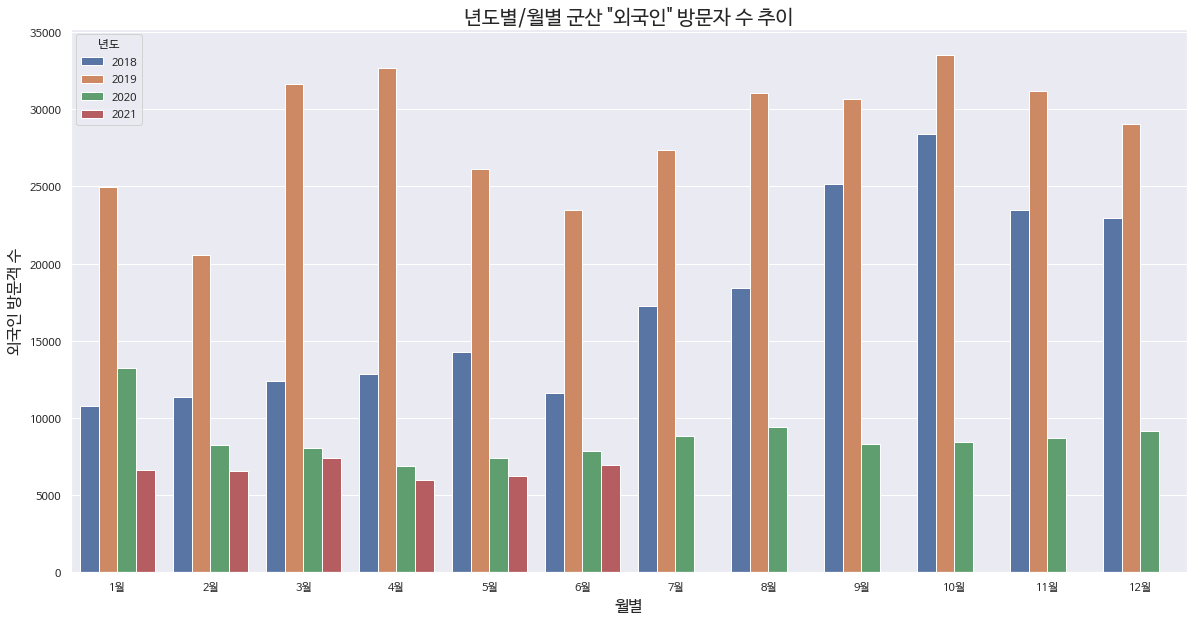

In [31]:
sns.barplot(data=final_fore, x ="월별", y="외국인 관광객수", hue="년도")
plt.title('년도별/월별 군산 "외국인" 방문자 수 추이',fontsize=20)
plt.xlabel('월별',fontsize=16)
plt.ylabel('외국인 방문객 수',fontsize=16)

- 2018년도보다 2019년도에 큰 폭 증가
- 코로나 이후 확연히 저조한 방문객 수 

#년도별/월별 외지인 방문자 수 추이 

In [32]:
#외지인 방문객(국내 방문객)
korean = train.loc[[1],]

y_kor= korean.iloc[:,2:]
y_kor = y_kor.iloc[0,:].values

final_kor = pd.DataFrame({'년도' : data, '월별' : x,'외지인 관광객수' :y_kor})

In [33]:
final_kor['외지인 관광객수'] = final_kor['외지인 관광객수'].map(lambda x: re.sub(r',', '', x))
final_kor['외지인 관광객수'] = final_kor['외지인 관광객수'].apply(pd.to_numeric)

- 군산의 외지인 방문자 수 추이 lineplot

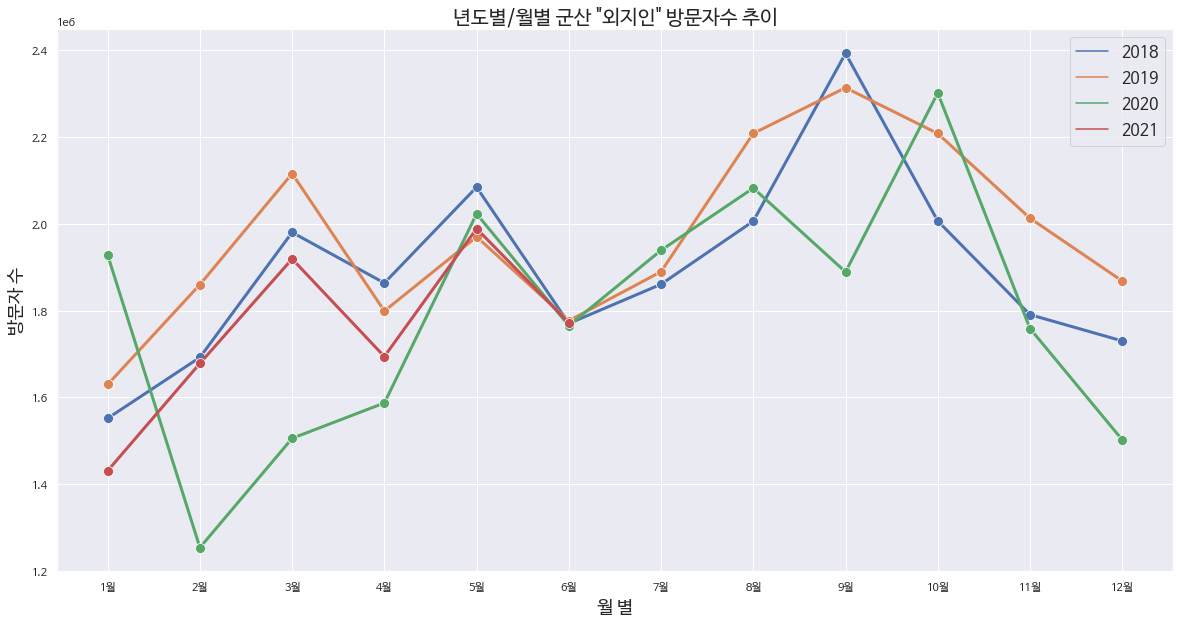

In [34]:
sns.lineplot(x=final_kor['월별'], y =final_kor['외지인 관광객수'], hue=final_kor['년도'], linestyle='-',marker='o',linewidth = 3,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('년도별/월별 군산 "외지인" 방문자수 추이', fontsize=20)
plt.legend(fontsize=16)
plt.show()

- 군산의 외지인 방문자 수 추이 barplot

Text(0, 0.5, '외지인 방문객 수')

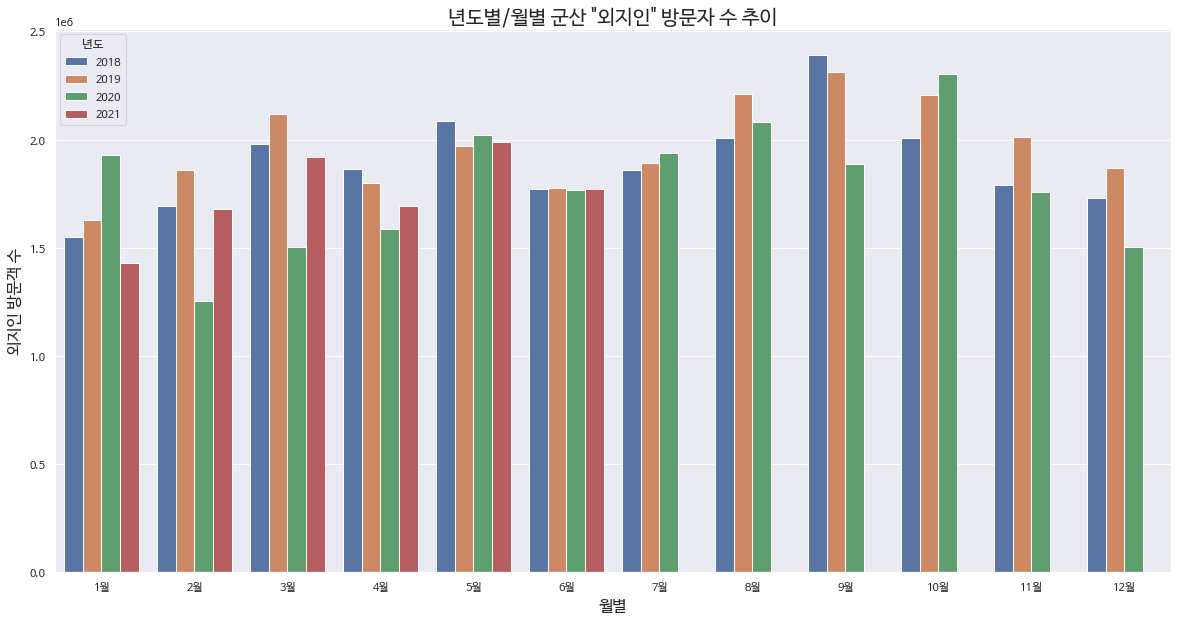

In [35]:
sns.barplot(data=final_kor, x ="월별", y="외지인 관광객수", hue="년도")
plt.title('년도별/월별 군산 "외지인" 방문자 수 추이',fontsize=20)
plt.xlabel('월별',fontsize=16)
plt.ylabel('외지인 방문객 수',fontsize=16)

- 외부 방문객 (외국인+외지인) 의 그래프 양상과 거의 유사
- 코로나로 인해 2020년 2월 급격히 방문객이 줄었지만, 금새 평년과 유사하게 **회복**했음


# 월별 외지인/외국인 방문객 평균

- 월별 외국인 방문객 평균

In [36]:
final_fore.head()

,년도,월별,외국인 관광객수
0,2018,1월,10781
1,2018,2월,11368
2,2018,3월,12386
3,2018,4월,12869
4,2018,5월,14285


In [37]:
# 월별로 외국인 관광객 수 평균 내기
final_fore_mean = final_fore.groupby(['월별'], as_index=False).mean()
final_fore_mean.head()

,월별,외국인 관광객수
0,10월,23445.000000
1,11월,21119.000000
2,12월,20398.333333
3,1월,13898.750000
4,2월,11685.000000


Text(0, 0.5, '외국인 방문객 수의 평균')

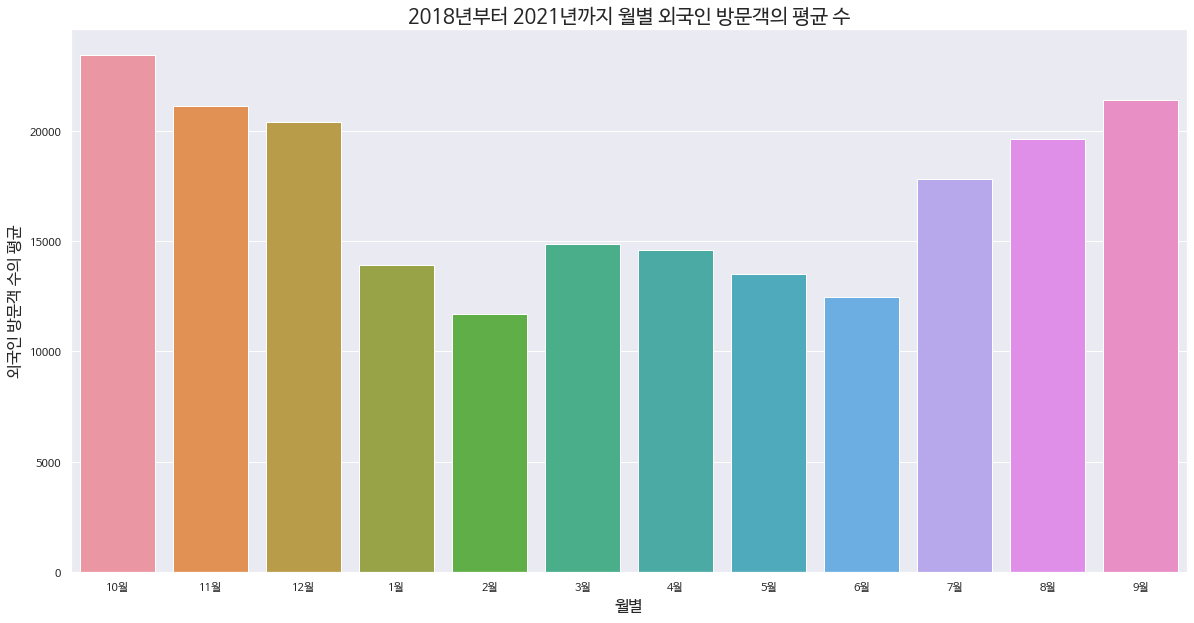

In [38]:
sns.barplot(data=final_fore_mean, x ="월별", y="외국인 관광객수")
plt.title('2018년부터 2021년까지 월별 외국인 방문객의 평균 수', fontsize=20)
plt.xlabel('월별',fontsize=16)
plt.ylabel('외국인 방문객 수의 평균',fontsize=16)

- 8,9,10,11,12월에 외국인 방문객이 많다

- 월별 외지인 방문객 평균

In [39]:
# 월별로 외국인 관광객 수 평균 내기
final_kor_mean = final_kor.groupby(['월별'], as_index=False).mean()
final_kor_mean.head()

,월별,외지인 관광객수
0,10월,2171942.00
1,11월,1854004.00
2,12월,1700137.00
3,1월,1635047.75
4,2월,1621058.25


Text(0, 0.5, '외지인 방문객 수의 평균')

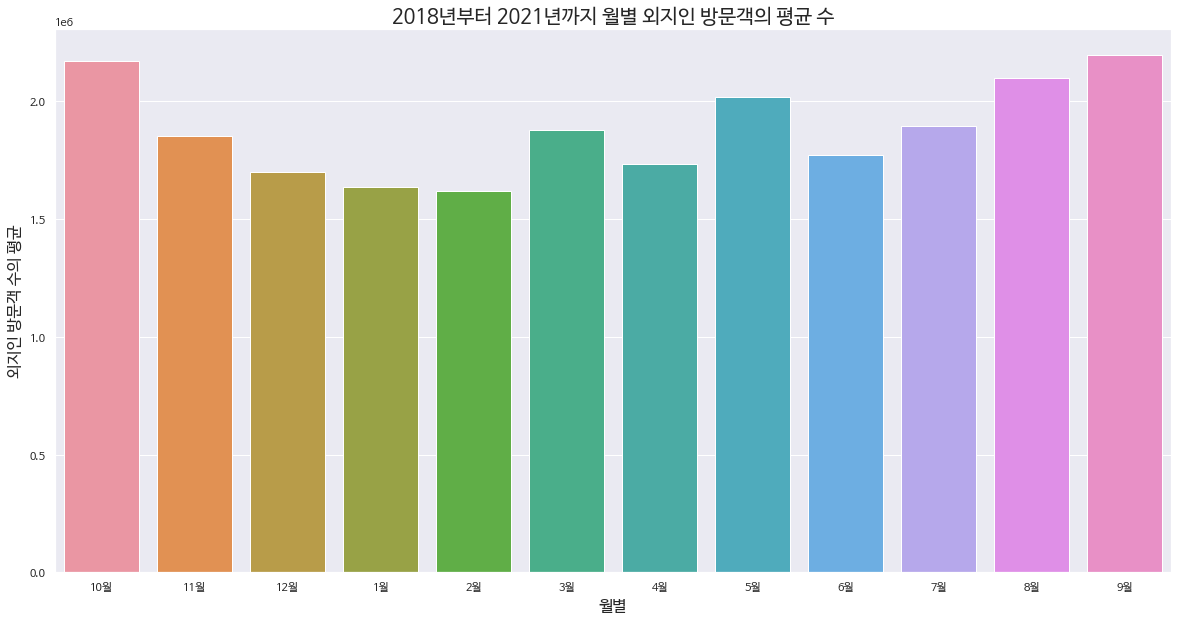

In [40]:
sns.barplot(data=final_kor_mean, x ="월별", y="외지인 관광객수")
plt.title('2018년부터 2021년까지 월별 외지인 방문객의 평균 수', fontsize=20)
plt.xlabel('월별',fontsize=16)
plt.ylabel('외지인 방문객 수의 평균',fontsize=16)

# 군산/목포/통영 외지인(내국인) 방문객 수 비교

2018년 외지인 방문객 수 비교

In [42]:
train_moc = pd.read_csv("../data/목포 방문객.csv", encoding='cp949')
train_tong = pd.read_csv("../data/통영 방문객.csv", encoding ='cp949')

train_moc.head()

,Unnamed: 0,Unnamed: 1,2018,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,2021,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43
0,지역,구분,1,2,3,4,5,6,7,8,...,9,10,11,12,1,2,3,4,5,6
1,목포시,외지인(b),"1,711,812","1,763,422","1,899,030","1,738,376","1,925,122","1,707,251","1,886,892","2,025,681",...,"1,655,255","2,083,062","1,808,876","1,681,670","1,626,541","1,696,051","1,832,089","1,744,043","1,907,686","1,793,183"
2,목포시,외국인(c),"3,336","2,888","4,083","4,711","5,746","4,860","6,728","6,558",...,"2,322","2,081","2,090","2,031","1,574","1,444","1,799","1,907","1,816","1,436"
3,목포시,외부방문자(b+c),"1,715,147","1,766,310","1,903,113","1,743,088","1,930,869","1,712,111","1,893,620","2,032,239",...,"1,657,577","2,085,143","1,810,966","1,683,700","1,628,115","1,697,495","1,833,888","1,745,950","1,909,502","1,794,619"
4,목포시,전년외부방문자(b'+c'),0,0,0,0,0,0,0,0,...,"2,147,977","2,139,171","2,030,681","2,022,728","2,092,915","1,537,141","1,487,487","1,463,355","1,889,588","1,703,281"


In [43]:
# 목포 외지인 방문객 2018
moc_korean = train_moc.iloc[[1],2:14]

# 통영 외지인 방문객 2018
tong_korean = train_tong.iloc[[1],2:14]

In [44]:
y_moc = moc_korean.iloc[0,:].values
y_tong = tong_korean.iloc[0,:].values

final6 = pd.DataFrame({'통영' : y_tong,'목포' :y_moc,'군산' :y_korean, '월별':x2})
final6

,통영,목포,군산,월별
0,"1,250,277","1,711,812","1,551,704",1월
1,"1,282,169","1,763,422","1,692,131",2월
2,"1,320,946","1,899,030","1,980,181",3월
3,"1,372,364","1,738,376","1,863,480",4월
4,"1,467,270","1,925,122","2,084,383",5월
5,"1,255,796","1,707,251","1,770,142",6월
6,"1,444,569","1,886,892","1,860,586",7월
7,"1,661,740","2,025,681","2,006,011",8월
8,"1,452,514","2,166,496","2,392,586",9월
9,"1,351,228","1,873,354","2,006,438",10월


In [45]:
final6['통영'] = final6['통영'].map(lambda x: re.sub(r',', '', x))
final6['군산'] = final6['군산'].map(lambda x: re.sub(r',', '', x))
final6['목포'] = final6['목포'].map(lambda x: re.sub(r',', '', x))

final6['통영'] = final6['통영'].apply(pd.to_numeric)
final6['군산'] = final6['군산'].apply(pd.to_numeric)
final6['목포'] = final6['목포'].apply(pd.to_numeric)

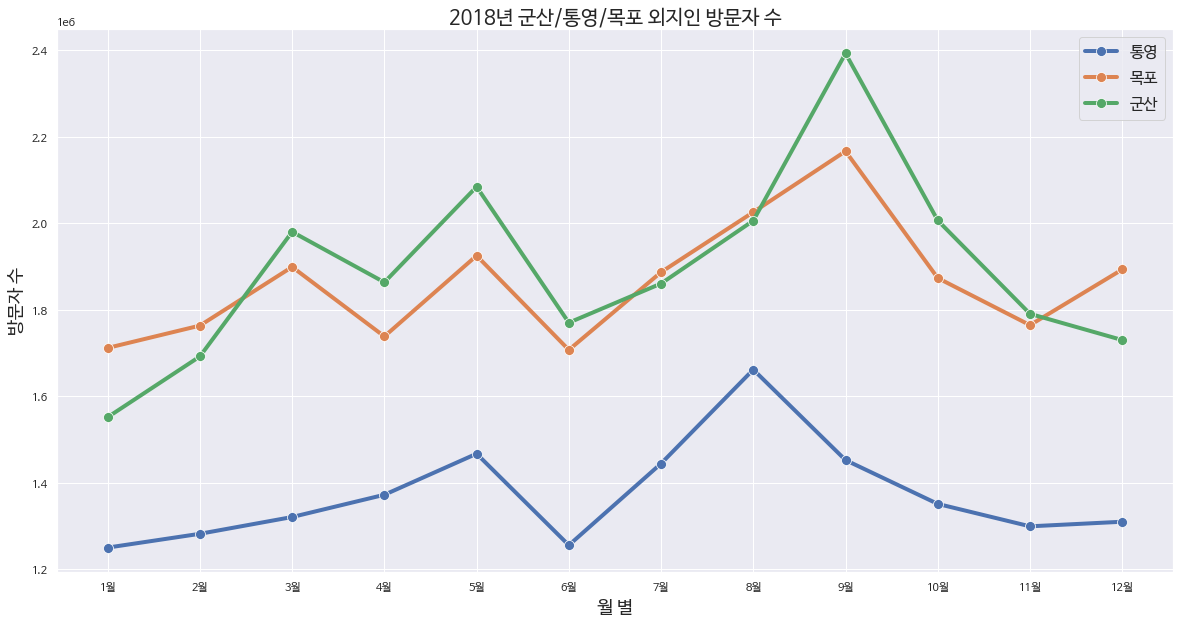

In [46]:
sns.lineplot(x=final6['월별'], y =final6['통영'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final6['월별'], y =final6['목포'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final6['월별'], y =final6['군산'], linestyle='-',marker='o',linewidth = 4,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('2018년 군산/통영/목포 외지인 방문자 수', fontsize=20)
plt.legend(labels =['통영','목포','군산'],fontsize=16)
plt.show()

- 군산의 관광객은 목포와 유사하거나 주로 높음


2019년 외지인 방문객 수 비교

In [47]:
# 목포 외지인 방문객 2019
moc_korean2 = train_moc.iloc[[1],14:26]

# 통영 외지인 방문객 2019
tong_korean2 = train_tong.iloc[[1],14:26]

In [48]:
y_moc2 = moc_korean2.iloc[0,:].values
y_tong2 = tong_korean2.iloc[0,:].values

final7 = pd.DataFrame({'통영' : y_tong2,'목포' :y_moc2,'군산' :y_korean2, '월별':x2})
final7

,통영,목포,군산,월별
0,"1,259,318","1,795,220","1,629,677",1월
1,"1,384,593","1,923,530","1,859,960",2월
2,"1,421,791","1,994,542","2,115,708",3월
3,"1,307,502","1,825,716","1,798,895",4월
4,"1,391,190","1,909,915","1,970,024",5월
5,"1,242,098","1,771,917","1,776,610",6월
6,"1,355,382","1,940,676","1,889,615",7월
7,"1,691,876","2,144,919","2,208,202",8월
8,"1,275,936","2,139,704","2,313,549",9월
9,"1,359,470","2,130,432","2,208,062",10월


In [49]:
final7['통영'] = final7['통영'].map(lambda x: re.sub(r',', '', x))
final7['군산'] = final7['군산'].map(lambda x: re.sub(r',', '', x))
final7['목포'] = final7['목포'].map(lambda x: re.sub(r',', '', x))

final7['통영'] = final7['통영'].apply(pd.to_numeric)
final7['군산'] = final7['군산'].apply(pd.to_numeric)
final7['목포'] = final7['목포'].apply(pd.to_numeric)

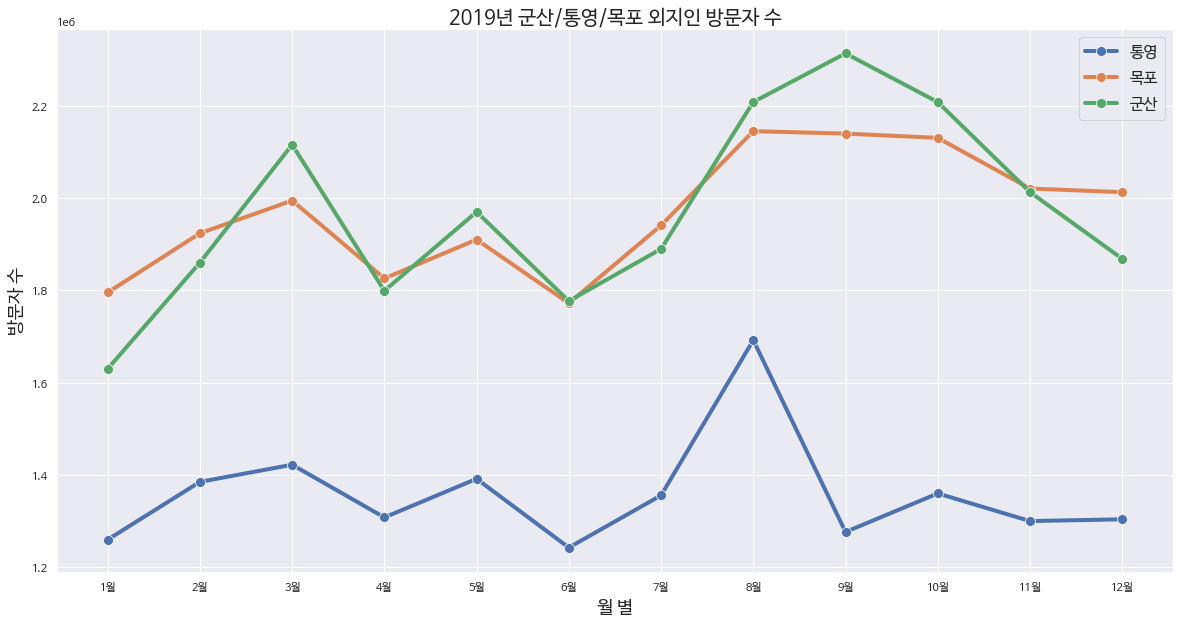

In [50]:
sns.lineplot(x=final7['월별'], y =final7['통영'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final7['월별'], y =final7['목포'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final7['월별'], y =final7['군산'], linestyle='-',marker='o',linewidth = 4,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('2019년 군산/통영/목포 외지인 방문자 수', fontsize=20)
plt.legend(labels =['통영','목포','군산'],fontsize=16)
plt.show()

2020년도 외지인 방문객 수 비교

In [51]:
# 목포 외지인 방문객 2021
moc_korean3 = train_moc.iloc[[1],26:38]

# 통영 외지인 방문객 2018
tong_korean3 = train_tong.iloc[[1],26:38]

In [52]:
y_moc3 = moc_korean3.iloc[0,:].values
y_tong3 = tong_korean3.iloc[0,:].values

final8 = pd.DataFrame({'통영' : y_tong3,'목포' :y_moc3,'군산' :y_korean3, '월별':x2})
final8

,통영,목포,군산,월별
0,"1,407,763","2,089,745","1,927,933",1월
1,"1,011,185","1,535,121","1,253,798",2월
2,"1,040,344","1,486,020","1,505,564",3월
3,"1,047,662","1,462,006","1,587,072",4월
4,"1,398,540","1,888,170","2,022,912",5월
5,"1,208,350","1,701,340","1,765,113",6월
6,"1,322,041","1,862,892","1,938,850",7월
7,"1,799,182","2,020,056","2,082,258",8월
8,"1,108,096","1,655,255","1,889,055",9월
9,"1,566,380","2,083,062","2,301,326",10월


In [53]:
final8['통영'] = final8['통영'].map(lambda x: re.sub(r',', '', x))
final8['군산'] = final8['군산'].map(lambda x: re.sub(r',', '', x))
final8['목포'] = final8['목포'].map(lambda x: re.sub(r',', '', x))

final8['통영'] = final8['통영'].apply(pd.to_numeric)
final8['군산'] = final8['군산'].apply(pd.to_numeric)
final8['목포'] = final8['목포'].apply(pd.to_numeric)

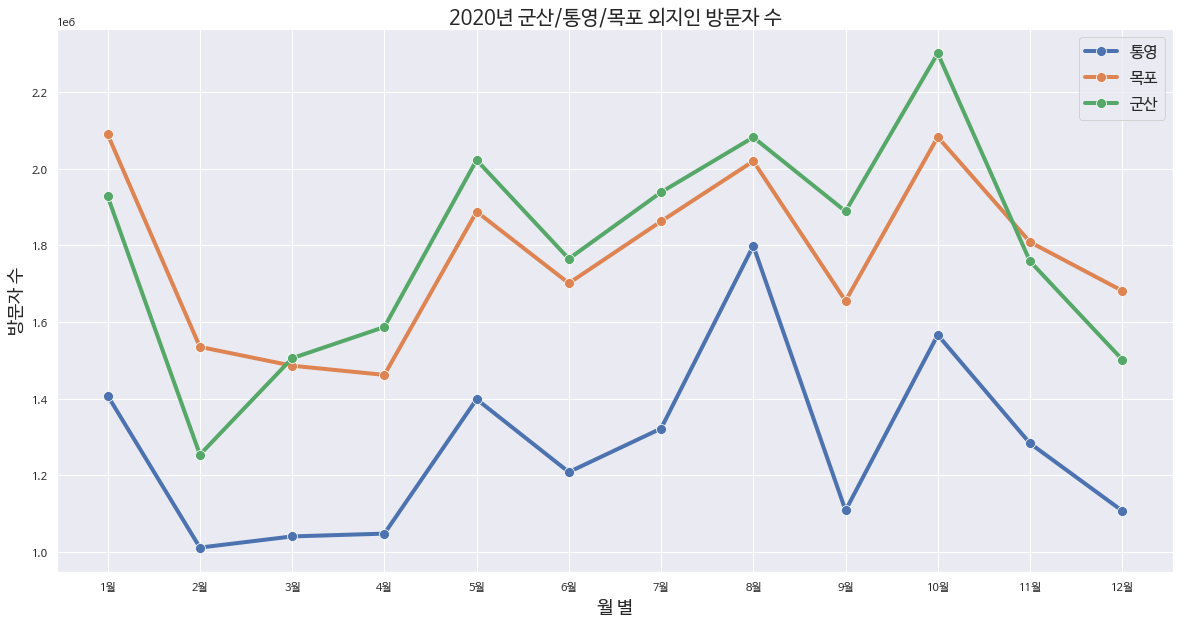

In [54]:
sns.lineplot(x=final8['월별'], y =final8['통영'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final8['월별'], y =final8['목포'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final8['월별'], y =final8['군산'], linestyle='-',marker='o',linewidth = 4,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('2020년 군산/통영/목포 외지인 방문자 수', fontsize=20)
plt.legend(labels =['통영','목포','군산'],fontsize=16)
plt.show()

군산/목포/통영 2021년도 외지인 방문객 수 비교

In [55]:
# 목포 외지인 방문객 2021
moc_korean4 = train_moc.iloc[[1],38:44]

# 통영 외지인 방문객 2021
tong_korean4 = train_tong.iloc[[1],38:44]

In [56]:
y_moc4 = moc_korean4.iloc[0,:].values
y_tong4 = tong_korean4.iloc[0,:].values

final9 = pd.DataFrame({'통영' : y_tong4,'목포' :y_moc4,'군산' :y_korean4, '월별':x3})
final9

,통영,목포,군산,월별
0,"1,078,826","1,626,541","1,430,877",1월
1,"1,206,170","1,696,051","1,678,344",2월
2,"1,114,064","1,832,089","1,919,001",3월
3,"1,129,580","1,744,043","1,694,074",4월
4,"1,318,513","1,907,686","1,988,878",5월
5,"1,220,681","1,793,183","1,771,766",6월


In [57]:
final9['통영'] = final9['통영'].map(lambda x: re.sub(r',', '', x))
final9['군산'] = final9['군산'].map(lambda x: re.sub(r',', '', x))
final9['목포'] = final9['목포'].map(lambda x: re.sub(r',', '', x))

final9['통영'] = final9['통영'].apply(pd.to_numeric)
final9['군산'] = final9['군산'].apply(pd.to_numeric)
final9['목포'] = final9['목포'].apply(pd.to_numeric)

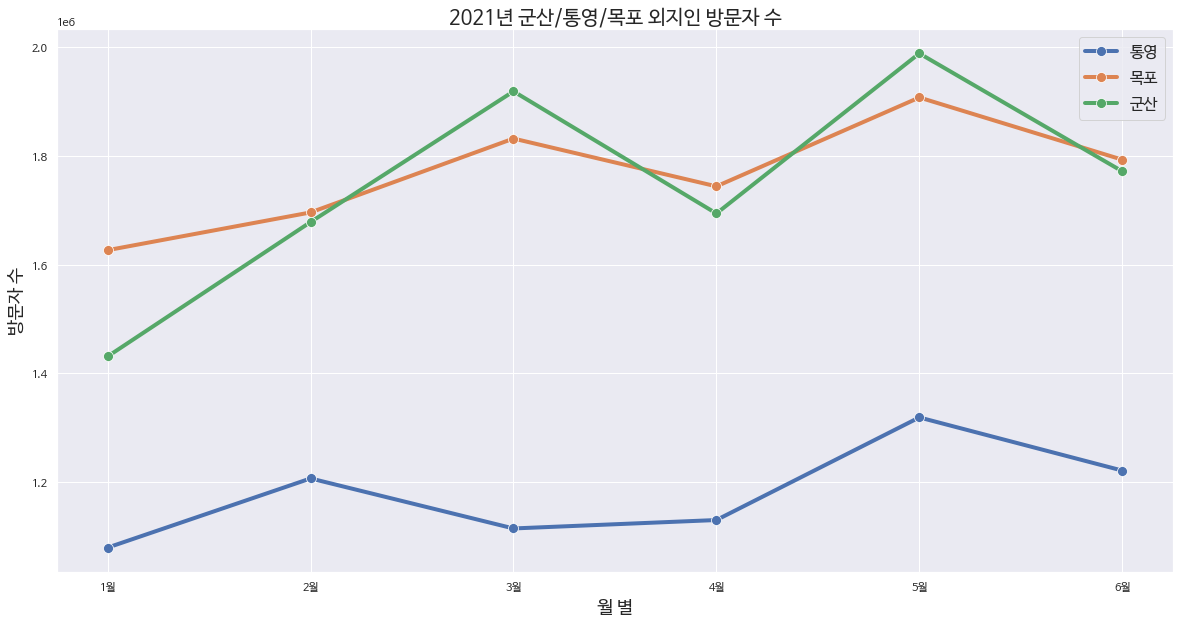

In [58]:
sns.lineplot(x=final9['월별'], y =final9['통영'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final9['월별'], y =final9['목포'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final9['월별'], y =final9['군산'], linestyle='-',marker='o',linewidth = 4,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('2021년 군산/통영/목포 외지인 방문자 수', fontsize=20)
plt.legend(labels =['통영','목포','군산'],fontsize=16)
plt.show()

- 군산/통영/목포 외부인(외지인+외국인) 방문자수 월별 평균 비교 (2018-2020년)

In [59]:
# 통영 외부인 데이터
tong = train_tong.loc[[3],]
y_tong_new = tong.iloc[:,2:]
y_tong_new = y_tong_new.iloc[0,:].values

final_tong = pd.DataFrame({'년도' : data, '월별' : x,'방문객수' :y_tong_new})

In [60]:
final_tong['방문객수'] = final_tong['방문객수'].map(lambda x: re.sub(r',', '', x))
final_tong['방문객수'] = final_tong['방문객수'].apply(pd.to_numeric)

In [61]:
# 목포 외부인 데이터
moc = train_moc.loc[[3],]
y_moc_new = moc.iloc[:,2:]
y_moc_new = y_moc_new.iloc[0,:].values

final_moc = pd.DataFrame({'년도' : data, '월별' : x,'방문객수' :y_moc_new})

In [62]:
final_moc['방문객수'] = final_moc['방문객수'].map(lambda x: re.sub(r',', '', x))
final_moc['방문객수'] = final_moc['방문객수'].apply(pd.to_numeric)

In [63]:
final = final.groupby('월별').mean()
final_moc = final_moc.groupby('월별').mean()
final_tong = final_tong.groupby('월별').mean()

final_moc = final_moc.reindex(index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
final = final.reindex(index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])
final_tong = final_tong.reindex(index = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'])

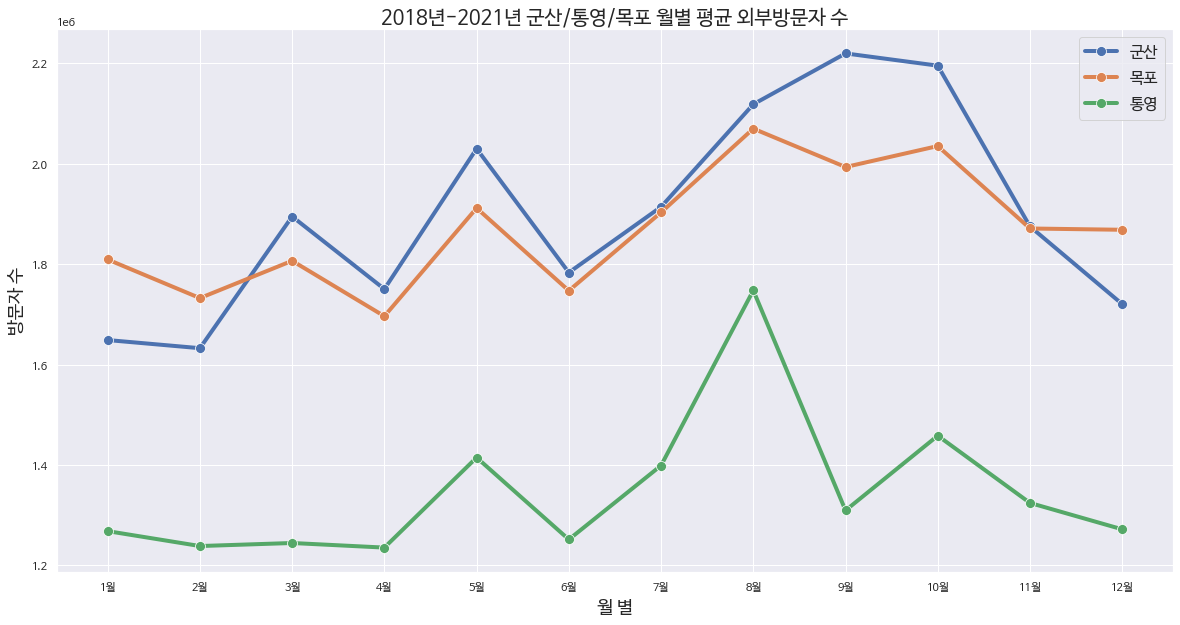

In [64]:
sns.lineplot(x=final.index, y =final['방문객수'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final.index, y =final_moc['방문객수'], linestyle='-',marker='o',linewidth = 4,markersize=10)
sns.lineplot(x=final.index, y =final_tong['방문객수'], linestyle='-',marker='o',linewidth = 4,markersize=10)
plt.xlabel('월 별', fontsize=18)
plt.ylabel('방문자 수', fontsize=18)
plt.title('2018년-2021년 군산/통영/목포 월별 평균 외부방문자 수', fontsize=20)
plt.legend(labels =['군산','목포','통영'],fontsize=16)
plt.show()